# pre-compute coordinates for Coordinate Embedding

* For Convolutional layers on CoordConv
* For input


The coordinates that are computed hsould be:
- Absolute
- Relative

pre-compute coorinates in:

Sin|Cos transforms for different periods

Different radious signals for linear vectors

In [85]:
#

import numpy as np
import torch
from torch import nn
import math

import matplotlib.pyplot as plt

%matplotlib inline



In [71]:
def get_coord_emb(shape=(1024, 22), fibinit=6):
    """
    Computes #channels coordinates for a vector of the given length.
    The coordinates are computed as follow,:
        if fibinit > 0 uses shape[1] elements from fibonacci series starting from fibinit in the series
         and computes the sine & cosine for the #fibonacci values in 0->2*PI
        else computes the sine & cosine the 0->2*PI range for each value in 1->shape[1]
    @param shape: shape (length,channels) of the embedding vector
    @param fibinit: if 0 uses linear, if >0 uses fibonacci series
    @return: a vector of shape of the input value
    """

    assert (len(shape) == 2 and shape[0] > 100 and shape[1] > 0)
    ncoords = shape[1] // 2
    d_coord = shape[0]
    # get steps
    if fibinit > 0:
        # Fibonacci numbers so the signals can mix and give longer relations and have absolute like ordering which can
        # be used for longer sentences than the given input
        fib(ncoords + fibinit)
        steps = FibArray[fibinit:ncoords + fibinit]
    else:
        # Linear relations so the signals are more time independent and there is only relative ordering into the
        # input vector only
        steps = [d_coord // (i + 1) for i in range(ncoords)]
    PI2 = 2 * np.pi

    ret = []
    for stp in steps:
        arr = np.arange(0, PI2, PI2 / float(stp))
        oarr = np.tile(arr, int(np.ceil(float(d_coord) / stp)))
        ret.append(oarr[:d_coord])

    sret = np.stack(np.concatenate([np.sin(ret), np.cos(ret)]))
    return sret


In [104]:
rets = get_coord_emb(shape=(1024, 22), fibinit=6)

In [105]:
rets.shape

(22, 1024)

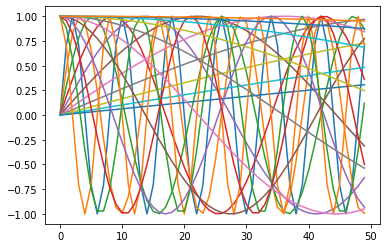

In [106]:
plt.plot(np.transpose(rets[:,:50]))
plt.show()

In [78]:
rets2 = get_coord_emb(shape=(1024,10), fibinit=0)

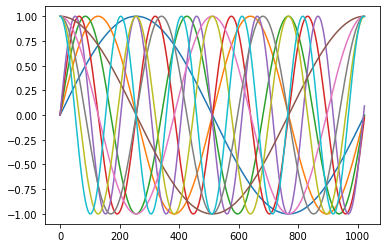

In [79]:
plt.plot(np.transpose(rets2))
plt.show()

In [120]:
max_len, d_model = 20, 4

In [121]:
pe = torch.zeros(max_len, d_model)
position = torch.arange(0, max_len).unsqueeze(1).float()
div_term = torch.exp(torch.arange(0, d_model, 2).float() *
                     -(math.log(10000.0) / d_model))
pe[:, 0::2] = torch.sin(position * div_term)
pe[:, 1::2] = torch.cos(position * div_term)
pe = pe.unsqueeze(0)
weight = nn.Parameter(pe, requires_grad=False)

In [132]:
pe[:, 1::2 ]

tensor([[[ 0.8415,  0.5403,  0.0100,  0.9999],
         [ 0.1411, -0.9900,  0.0300,  0.9996],
         [-0.9589,  0.2837,  0.0500,  0.9988],
         [ 0.6570,  0.7539,  0.0699,  0.9976],
         [ 0.4121, -0.9111,  0.0899,  0.9960],
         [-1.0000,  0.0044,  0.1098,  0.9940],
         [ 0.4202,  0.9074,  0.1296,  0.9916],
         [ 0.6503, -0.7597,  0.1494,  0.9888],
         [-0.9614, -0.2752,  0.1692,  0.9856],
         [ 0.1499,  0.9887,  0.1889,  0.9820]]])

In [118]:
pos = torch.arange(0, 10).unsqueeze(0).float()

In [116]:
div_term = torch.exp(torch.arange(0, d_model, 2).float() * -(math.log(10000.0) / d_model))

In [119]:
pos * div_term

tensor([[0.0000, 0.3981, 0.3170, 0.1893, 0.1005, 0.0500, 0.0239, 0.0111, 0.0050,
         0.0023]])

In [92]:
nppe = pe.cpu().detach().numpy()

In [97]:
nppe.shape

(1, 512, 20)

In [98]:
nppe = nppe.reshape(512,20).transpose()

In [99]:
nppe.shape

(20, 512)

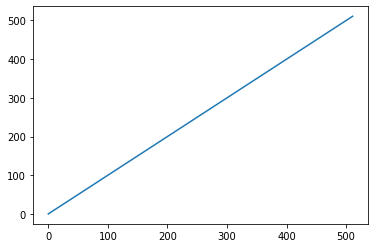

In [109]:
plt.plot(position)

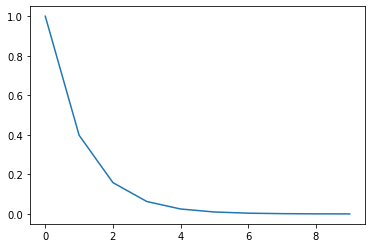

In [108]:
plt.plot(div_term)

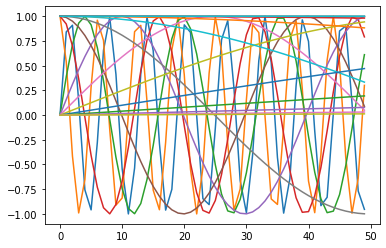

In [103]:
plt.plot(np.transpose(nppe[:,:50]))
plt.show()